In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
plt.style.use('fivethirtyeight')
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


from datetime import datetime
import dataframe_image as dfi
from statsmodels.tsa.seasonal import seasonal_decompose
import time
import glob
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import explained_variance_score, mean_squared_error, r2_score

In [2]:
%cd "/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/"

/Users/brendan/Desktop/Python/Hustle Projects/Airbnb


In [4]:
# function to download all listings data
def get_listings_naples_timeseries():
    """Function scraping all links to listings.csv files available on insideairbnb.com
    website, and saving downloaded files in a /data/raw-data folder.
    The files are named after their collection date (YYYY-MM.csv)."""
    soup = bs(requests.get('http://insideairbnb.com/get-the-data.html').content,'lxml')
    link_lst = [i['href'] for i in soup.select("td:contains('naples')+td>a[onclick*=listings]")]
    subfolder_names = ['raw-data']
    for subfolder_name in subfolder_names:
        os.makedirs(os.path.join('data4',subfolder_name))
    for link in link_lst:
        file = pd.read_csv(link)
        date = re.findall(r'20\d{2}-\d{2}',link)[0]
        file.to_csv(f'data4/raw-data/naples_{date}.csv',index=False)
get_listings_naples_timeseries()

NameError: name 'bs' is not defined

In [3]:
# pull in detailed_listings
raw_df_naples = pd.read_csv('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/naples/naples_detailed.csv')

print(f"The detailed listings dataset contains {len(raw_df_naples)} AirBnb listings.")
#print(f"The most recent listings dataset contains {len(naples_raw_df_11_4_2021)} Airbnb listings.")


The detailed listings dataset contains 7142 AirBnb listings.


In [4]:
naples_raw_df_12_12_2020 = pd.read_csv('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/naples/naples_2020-12.csv')
naples_raw_df_12_12_2020.shape


(8084, 16)

In [5]:
# use magic commands 'cd' to change directory
# use glob to locate all files for naples
%cd "/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data1"
files_naples = glob.glob('naples/**.csv')
files_naples

/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data1


['naples/Naples_2021-01.csv',
 'naples/Naples_2021-03.csv',
 'naples/Naples_2021-02.csv',
 'naples/Naples_2021-06.csv',
 'naples/Naples_2021-07.csv',
 'naples/Naples_2021-04.csv',
 'naples/Naples_2021-10.csv',
 'naples/Naples_2020-12.csv',
 'naples/Naples_2021-09.csv',
 'naples/Naples_2021-08.csv']

In [6]:
# create individual dataframes for each file
# summarize each file (# of listings; avg price in euro)

naples_raw_df_12_12_2020 = pd.read_csv('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/naples/naples_2020-12.csv')
print(f"The 12_12_2020 dataset contains {len(naples_raw_df_12_12_2020)} AirBnb listings; the avg price is €{round(naples_raw_df_12_12_2020['price'].mean(),2)}.")

naples_raw_df_1_9_2021 = pd.read_csv('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/naples/naples_2021-01.csv')
print(f"The 1_9_2021 dataset contains {len(naples_raw_df_1_9_2021)} AirBnb listings; the avg price is €{round(naples_raw_df_1_9_2021['price'].mean(),2)}.")

naples_raw_df_2_8_2021 = pd.read_csv('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/naples/naples_2021-02.csv')
print(f"The 2_8_2021 dataset contains {len(naples_raw_df_2_8_2021)} AirBnb listings; the avg price is €{round(naples_raw_df_2_8_2021['price'].mean(),2)}.")

naples_raw_df_3_4_2021 = pd.read_csv('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/naples/naples_2021-03.csv')
print(f"The 3_4_2021 dataset contains {len(naples_raw_df_3_4_2021)} AirBnb listings; the avg price is €{round(naples_raw_df_3_4_2021['price'].mean(),2)}.")

naples_raw_df_4_9_2021 = pd.read_csv('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/naples/naples_2021-04.csv')
print(f"The 4_9_2021 dataset contains {len(naples_raw_df_4_9_2021)} AirBnb listings; the avg price is €{round(naples_raw_df_4_9_2021['price'].mean(),2)}.")

#naples_raw_df_5_19_2021 = pd.read_csv('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/naples/naples_2021-05.csv')
#print(f"The 5_19_2021 dataset contains {len(naples_raw_df_5_19_2021)} AirBnb listings; the avg price is €{round(naples_raw_df_5_19_2021['price'].mean(),2)}.")

naples_raw_df_6_3_2021 = pd.read_csv('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/naples/naples_2021-06.csv')
print(f"The 6_3_2021 dataset contains {len(naples_raw_df_6_3_2021)} AirBnb listings; the avg price is €{round(naples_raw_df_6_3_2021['price'].mean(),2)}.")

naples_raw_df_7_4_2021 = pd.read_csv('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/naples/naples_2021-07.csv')
print(f"The 7_4_2021 dataset contains {len(naples_raw_df_7_4_2021)} AirBnb listings; the avg price is €{round(naples_raw_df_7_4_2021['price'].mean(),2)}.")

naples_raw_df_8_6_2021 = pd.read_csv('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/naples/naples_2021-08.csv')
print(f"The 8_6_2021 dataset contains {len(naples_raw_df_8_6_2021)} AirBnb listings; the avg price is €{round(naples_raw_df_8_6_2021['price'].mean(),2)}.")

naples_raw_df_9_7_2021 = pd.read_csv('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/naples/naples_2021-09.csv')
print(f"The 9_7_2021 dataset contains {len(naples_raw_df_9_7_2021)} AirBnb listings; the avg price is €{round(naples_raw_df_9_7_2021['price'].mean(),2)}.")

naples_raw_df_10_6_2021 = pd.read_csv('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/naples/naples_2021-10.csv')
print(f"The 10_6_2021 dataset contains {len(naples_raw_df_10_6_2021)} AirBnb listings; the avg price is €{round(naples_raw_df_10_6_2021['price'].mean(),2)}.")

#naples_raw_df_11_4_2021 = pd.read_csv('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/naples/naples_2021-11.csv')
#print(f"The 11_4_2021 dataset contains {len(naples_raw_df_11_4_2021)} AirBnb listings; the avg price is €{round(naples_raw_df_11_4_2021['price'].mean(),2)}.")


The 12_12_2020 dataset contains 8084 AirBnb listings; the avg price is €78.08.
The 1_9_2021 dataset contains 8039 AirBnb listings; the avg price is €71.68.
The 2_8_2021 dataset contains 7997 AirBnb listings; the avg price is €72.29.
The 3_4_2021 dataset contains 8030 AirBnb listings; the avg price is €73.04.
The 4_9_2021 dataset contains 7961 AirBnb listings; the avg price is €74.74.
The 6_3_2021 dataset contains 7909 AirBnb listings; the avg price is €77.02.
The 7_4_2021 dataset contains 7957 AirBnb listings; the avg price is €84.45.
The 8_6_2021 dataset contains 7311 AirBnb listings; the avg price is €90.63.
The 9_7_2021 dataset contains 7202 AirBnb listings; the avg price is €83.77.
The 10_6_2021 dataset contains 7142 AirBnb listings; the avg price is €88.39.


In [7]:
df_list_naples = [naples_raw_df_12_12_2020, naples_raw_df_1_9_2021, naples_raw_df_2_8_2021,
           naples_raw_df_3_4_2021, naples_raw_df_4_9_2021, naples_raw_df_6_3_2021, naples_raw_df_7_4_2021,
           naples_raw_df_8_6_2021, naples_raw_df_9_7_2021, naples_raw_df_10_6_2021]

dates_naples = ['12_12_2020', '01_9_2021', '02_08_2021','03_04_2021', '04_09_2021',
        '06_03_2021', '07_04_2021', '08_06_2021', '09_07_2021', '10_06_2021']

files_naples = ['2020-12', '2021-01', '2021-02', '2021-03', '2021-04',  '2021-06', '2021-07', '2021-08',
                  '2021-09', '2021-10']


df_final_naples = []

def airbnb_parse_naples(df_list, files):
    for file in files_naples:
        df_file = pd.read_csv(f"/Users/brendan/Desktop/Python/Two Sigma Projects/Airbnb/data1/naples/naples_{file}.csv")
        print(f"The {file} naples dataset contains {len(df_file)} AirBnb listings -- the avg price is €{round(df_file['price'].mean(),2)}.")
        #print(f"The avg price per night out of {len(df_file)} listings is  ${round(df_file['price'].mean(),2)}.")


def airbnb_to_frame_naples(df_list, dates):
    for file in files_naples:
        df_file = pd.read_csv(f"/Users/brendan/Desktop/Python/Two Sigma Projects/Airbnb/data1/naples/naples_{file}.csv")
        #print(f"The {date} Paris dataset contains {len(df_file)} AirBnb listings -- the avg price is ${round(df_file['price'].mean(),2)}.")
        df_final_naples.append(
        {
            'Date of scrape': file.replace('_', '/'),
            '# of Listings': len(df_file),
            'Avg Price': round(df_file['price'].mean(),2),
            'Median Price': round(df_file['price'].median(),2),
            'Min Price': df_file['price'].min(),
            'Max Price': df_file['price'].max(),
            'Avg reviews per month': round(df_file['reviews_per_month'].mean(),2)
        })
    
    return pd.DataFrame(df_final_naples)

naples_parse = airbnb_parse_naples(df_list_naples, files_naples)


The 2020-12 naples dataset contains 8084 AirBnb listings -- the avg price is €78.08.
The 2021-01 naples dataset contains 8039 AirBnb listings -- the avg price is €71.68.
The 2021-02 naples dataset contains 7997 AirBnb listings -- the avg price is €72.29.
The 2021-03 naples dataset contains 8030 AirBnb listings -- the avg price is €73.04.
The 2021-04 naples dataset contains 7961 AirBnb listings -- the avg price is €74.74.
The 2021-06 naples dataset contains 7909 AirBnb listings -- the avg price is €77.02.
The 2021-07 naples dataset contains 7957 AirBnb listings -- the avg price is €84.45.
The 2021-08 naples dataset contains 7311 AirBnb listings -- the avg price is €90.63.
The 2021-09 naples dataset contains 7202 AirBnb listings -- the avg price is €83.77.
The 2021-10 naples dataset contains 7142 AirBnb listings -- the avg price is €88.39.


In [8]:
naples_summary = airbnb_to_frame_naples(df_list_naples, files_naples)
naples_summary['Date of scrape'] = pd.to_datetime(naples_summary['Date of scrape'])
naples_summary['City'] = 'Naples'

dfi.export(naples_summary,"/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/naples/airbnb_naples_summary.png")


In [9]:
master_df_naples = pd.concat(df_list_naples)
master_df_naples_unique = master_df_naples.drop_duplicates(subset='id')
master_df_naples_unique.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,24398,"NAPOLI,wondeful apartment to rent",14169118,Gigi,NaN,San Carlo all'Arena,40.85714,14.25763,Entire home/apt,159,3,32,2018-11-30,0.25,8,90,NaN,NaN
1,30466,Naturists rooms in the heart of city,14169118,Gigi,NaN,San Carlo all'Arena,40.85759,14.25943,Private room,41,2,0,NaN,NaN,8,352,NaN,NaN
2,30536,cosy room to let in naples,14169118,Gigi,NaN,San Lorenzo,40.85543,14.25812,Private room,41,2,17,2017-11-27,0.13,8,73,NaN,NaN
3,49051,Robby's House B&B - Purple room -,223585,Roberto,NaN,San Lorenzo,40.85156,14.26255,Private room,29,1,48,2016-08-21,0.38,5,365,NaN,NaN
4,51629,Robby's House B&B - Green room -,223585,Roberto,NaN,San Lorenzo,40.85308,14.26167,Private room,29,1,48,2016-08-17,0.39,5,365,NaN,NaN


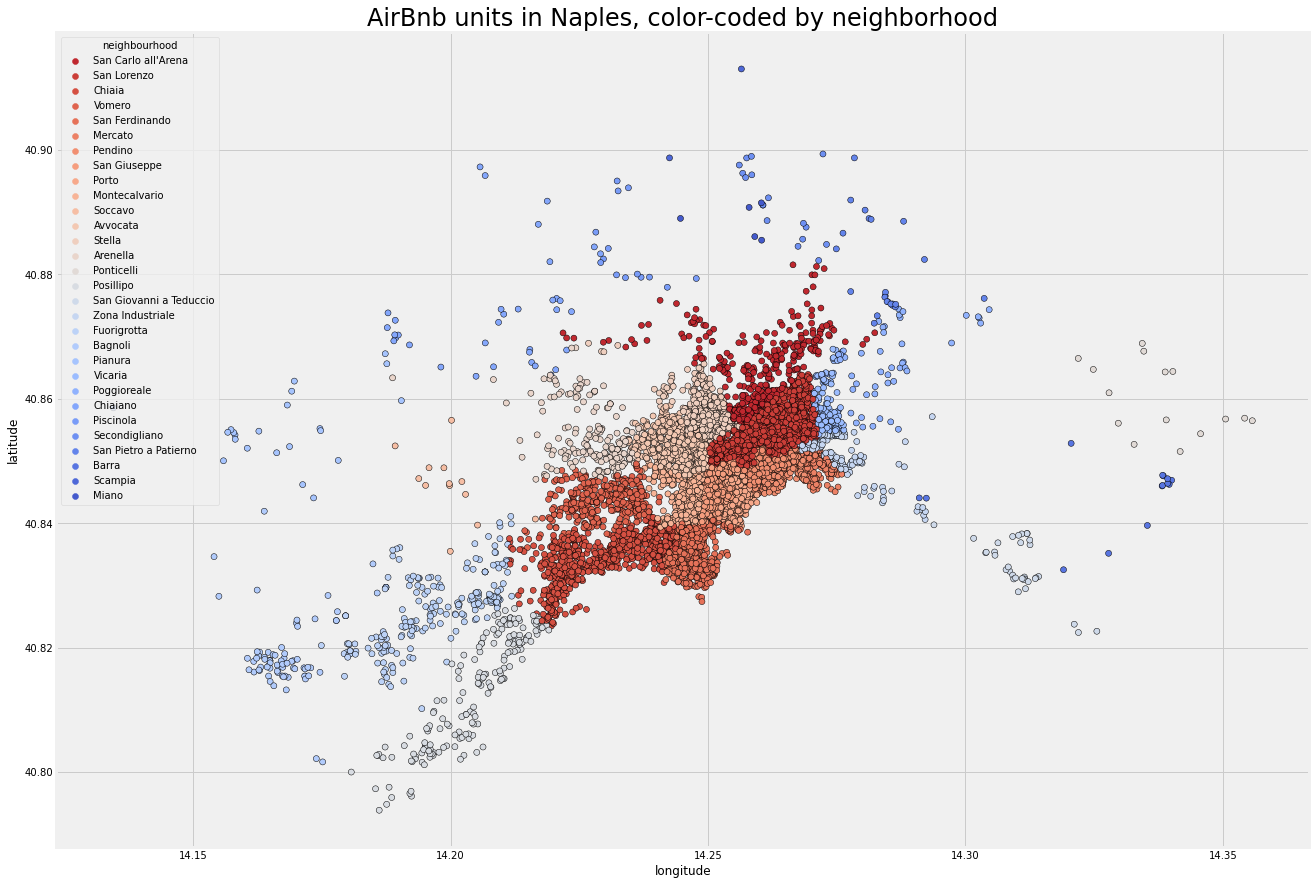

In [10]:
title = 'AirBnb units in Naples, color-coded by neighborhood'
plt.figure(figsize=(20,15))
#sns.set_palette("Paired_r")
sns.scatterplot(master_df_naples_unique.longitude, master_df_naples_unique.latitude, hue = master_df_naples_unique.neighbourhood, palette='coolwarm_r', edgecolor='black').set_title(title, fontsize=24)
plt.savefig('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/naples/airbnb_naples_map.png')
plt.show()

## Add review data through a join

In [11]:
df_reviews = pd.concat([naples_raw_df_10_6_2021,raw_df_naples],axis=1, join='outer')
df_reviews_ = df_reviews.loc[:,~df_reviews.columns.duplicated()]
df_reviews_ = df_reviews_[df_reviews_['accommodates'] <=6]
df_reviews_['accommodates'].value_counts()

2    2382
4    2012
3     974
6     603
5     513
1     143
0       3
Name: accommodates, dtype: int64

## Regression

In [12]:
#df_reviews_.columns

In [13]:
df_regression = df_reviews_.copy()
df_regression_ = df_regression[['id', 'property_type', 'room_type', 'accommodates',
                               'bedrooms', 'beds', 'price', 'availability_90','review_scores_rating',
                               'review_scores_accuracy','review_scores_cleanliness','review_scores_location',
                               'review_scores_value']]
df_regression_ = df_regression_[df_regression_['beds'].notna()]
df_regression_ = df_regression_[df_regression_['bedrooms'].notna()]
df_regression_['price'] = pd.to_numeric(df_regression_['price'])
df_regression_.isna().sum()

df_regression_=df_regression_.fillna(df_regression_.mean())

In [14]:
X_ = df_regression_[['accommodates', 'bedrooms','beds',
        'availability_90','review_scores_rating','review_scores_accuracy','review_scores_cleanliness','review_scores_location',
                               'review_scores_value']]

y = df_regression_['price'].replace({'\$':''}, regex = True)
Y = y.replace({',':''}, regex=True)

# with sklearn
regr = LinearRegression()
regr.fit(X_, Y)

print('Intercept: ', regr.intercept_)
print('Coefficients: ', regr.coef_)

print (regr)

Intercept:  2.187380229081853
Coefficients:  [ -0.50284287  18.70569832  -0.49866     -0.21196432   5.30284752
   2.99131478  14.69596688   9.3971801  -17.78344081]
LinearRegression()


In [15]:
y_pred2 = regr.predict(X_)

In [16]:
df_mult= pd.DataFrame({'Actual': Y, 'Predicted': y_pred2.flatten()})
df_mult['Diff'] = df_mult['Predicted'] - df_mult['Actual']
df_mult_sort = df_mult.sort_values(by=['Diff'])
df_result = (df_mult_sort[df_mult_sort['Actual'] >=25])
#df_result = df_mult_sort.query('Actual >= 75 & Actual <= 400')


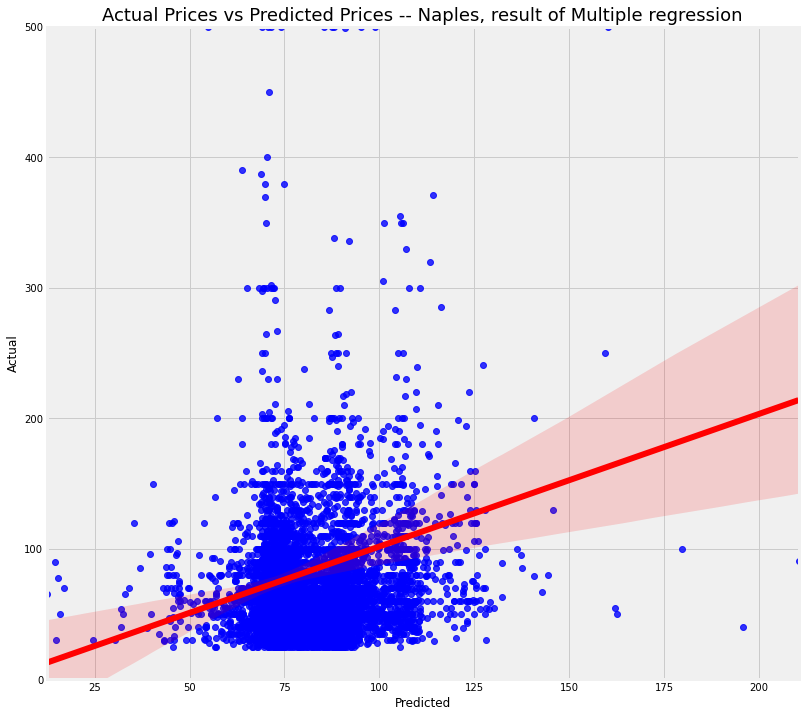

In [17]:
x = df_result['Predicted']
y = df_result['Actual']
fig = plt.figure(figsize=(12,12))
plt.title('Actual Prices vs Predicted Prices -- Naples, result of Multiple regression', fontsize=18)
plt.xlabel('Predicted €')
plt.ylabel('Actual €')
plt.ylim([0,500])
ax = sns.regplot(x,y, data=df_result,  scatter_kws={"color": "blue"}, line_kws={"color": "red"})
ax.figure.savefig('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/naples/airbnb_naples_multiple_regression.png')



In [18]:
df_result.shape

(6190, 3)

## The most mispriced [undervalued]

In [19]:
naples_mispriced = df_result.sort_values(by=['Diff'], ascending=False)
naples_mispriced['%'] = (naples_mispriced['Actual']/ naples_mispriced['Predicted'] -1) *100
naples_mispriced_perc = naples_mispriced.sort_values(by=['%'], ascending=True)
naples_mispriced_perc_plot = naples_mispriced_perc.loc[(naples_mispriced_perc['Predicted']>=1) & (naples_mispriced_perc['Diff']>= 1)]
naples_mispriced_perc_plot = naples_mispriced_perc_plot.sort_values(by=['%'],ascending=True)
naples_mispriced_perc_plot.head()
                                                             
                                                   

,Actual,Predicted,Diff,%
2603,40,195.636551,155.636551,-79.553923
6884,30,128.197206,98.197206,-76.598554
4223,25,105.349729,80.349729,-76.269517
711,29,114.262861,85.262861,-74.619925
1276,32,120.195528,88.195528,-73.376713


In [20]:

naples_mispriced_1 = raw_df_naples.loc[raw_df_naples.id==827]
naples_mispriced_2 = raw_df_naples.loc[raw_df_naples.id==748]
naples_mispriced_3 = raw_df_naples.loc[raw_df_naples.index==1308]
naples_mispriced_4 = raw_df_naples.loc[raw_df_naples.index==1748]
naples_mispriced_5 = raw_df_naples.loc[raw_df_naples.index==894]

In [20]:
id_array = [2603, 6884, 4223, 711, 1276]

naples_mispriced_query = raw_df_naples.query('index in @id_array')
naples_mispriced_query = naples_mispriced_query.rename({'index': 'id'}, axis=1)
naples_mispriced_query.shape
#naples_mispriced_query.head(1)

(5, 74)

In [21]:
#naples_mispriced_neg = raw_df_naples.loc[raw_df_naples.index==4119]
naples_mispriced_perc_1 = raw_df_naples.loc[raw_df_naples.id==7125]
naples_mispriced_perc_2 = raw_df_naples.loc[raw_df_naples.id==3679]
naples_mispriced_perc_3 = raw_df_naples.loc[raw_df_naples.id==8267]
naples_mispriced_perc_4 = raw_df_naples.loc[raw_df_naples.id==2483]
naples_mispriced_perc_5 = raw_df_naples.loc[raw_df_naples.id==3449]

In [22]:
naples_mispriced = naples_mispriced_query[['id','price','review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value','neighbourhood','listing_url']]
naples_mispriced_1 = naples_mispriced.rename({'review_scores_rating':'rating',
                                                    'review_scores_accuracy':'accuracy',
                                                    'review_scores_cleanliness':'cleanliness',
                                                    'review_scores_communication':'communication',
                                                    'review_scores_location':'location',
                                                    'review_scores_value':'value'}, axis=1)

naples_mispriced_1[:1]
naples_mispriced_1[:2]
naples_mispriced_1[:3]
naples_mispriced_1[:4]
naples_mispriced_1[:5]

,id,price,rating,accuracy,cleanliness,communication,location,value,neighbourhood,listing_url
711,9201410,$29.00,4.10,4.30,4.60,4.70,3.40,4.20,NaN,https://www.airbnb.com/rooms/9201410
1276,16047782,$32.00,4.52,4.65,4.43,4.96,4.57,4.50,NaN,https://www.airbnb.com/rooms/16047782
2603,24536397,$40.00,4.60,4.60,4.80,5.00,4.80,4.00,"Napoli, Campania, Italy",https://www.airbnb.com/rooms/24536397
4223,34584645,$25.00,4.71,4.62,4.81,4.90,4.81,4.86,"Napoli, Italia / Napoli / Campania, Italy",https://www.airbnb.com/rooms/34584645
6884,51662473,$30.00,2.00,4.00,2.00,1.00,4.00,1.00,NaN,https://www.airbnb.com/rooms/51662473


In [23]:
dfi.export(naples_mispriced_1,"/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/naples/airbnb_naples_mispriced.png")



## The best score

In [24]:
naples_high_value = df_result.sort_values(by=['Predicted'], ascending=False)
naples_high_value.head(6)

,Actual,Predicted,Diff
3560,91,210.375554,119.375554
2603,40,195.636551,155.636551
5513,100,179.698250,79.698250
5861,50,162.650521,112.650521
3501,55,162.165292,107.165292
6588,500,160.320115,-339.679885


In [25]:
id_array = [3560, 2603, 5513, 5861, 3501]

naples_best_score_query = raw_df_naples.query('index in @id_array')
naples_best_score_query = naples_best_score_query.rename({'index': 'id'}, axis=1)
#naples_best_score_query.head(1)

In [26]:
naples_best_score = naples_best_score_query[['id','price','review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value','neighbourhood','listing_url']]
naples_best_score_1 = naples_best_score.rename({'review_scores_rating':'rating',
                                                    'review_scores_accuracy':'accuracy',
                                                    'review_scores_cleanliness':'cleanliness',
                                                    'review_scores_communication':'communication',
                                                    'review_scores_location':'location',
                                                    'review_scores_value':'value'}, axis=1)

naples_best_score_1[:1]
naples_best_score_1[:2]
naples_best_score_1[:3]
naples_best_score_1[:4]
naples_best_score_1[:5]

,id,price,rating,accuracy,cleanliness,communication,location,value,neighbourhood,listing_url
2603,24536397,$40.00,4.6,4.60,4.8,5.00,4.80,4.00,"Napoli, Campania, Italy",https://www.airbnb.com/rooms/24536397
3501,30412757,$55.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,https://www.airbnb.com/rooms/30412757
3560,30785078,$91.00,4.0,5.00,2.0,5.00,5.00,3.00,NaN,https://www.airbnb.com/rooms/30785078
5513,42631700,$100.00,4.6,4.67,4.8,4.73,4.33,4.53,NaN,https://www.airbnb.com/rooms/42631700
5861,44672539,$50.00,3.0,3.00,5.0,3.00,5.00,1.00,NaN,https://www.airbnb.com/rooms/44672539


In [27]:
dfi.export(naples_best_score_1,"/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/naples/airbnb_naples_best_score.png")


